In [ ]:
import pandas as pd 
import numpy as np

from sklearn import datasets
from sklearn import metrics

#imports de pré-processamento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#biblioteca para visualização de dados 
import matplotlib.pyplot as plt

#imports de seleção de modelos
from sklearn.model_selection import train_test_split

#import clusterização
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
# -------- Lendo os dados --------
df_states2021 = pd.read_csv("/df_states2022.csv")
df_states2021

#Removendo colunas desnecessarias
df_states2021 = df_states2021.drop(['municipio', 'codmun', 'codRegiaoSaude', 'nomeRegiaoSaude', 'Recuperadosnovos', 'emAcompanhamentoNovos'], axis =1)
df_states2021 = df_states2021.drop_duplicates(keep="last")

# Selecionando apenas as colunas relevantes
relevant_columns = ['regiao', 'casosNovos', 'obitosNovos']
df_relevant = df_states2021[relevant_columns]

In [ ]:
# Aplicando a padronização Z-score
scaler = StandardScaler()
df_relevant_scaled = pd.DataFrame(scaler.fit_transform(df_relevant.iloc[:, 1:]), columns=['casosNovos', 'obitosNovos'])

# Adicionando a coluna 'regiao' novamente ao DataFrame padronizado
df_relevant_scaled['regiao'] = df_relevant['regiao']

# Aplicando o algoritmo K-means
kmeans = KMeans(n_clusters=3)  # Defina o número de clusters desejado
kmeans.fit(df_relevant_scaled.iloc[:, :-1])

# Obtendo os rótulos dos clusters atribuídos a cada ponto de dados
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


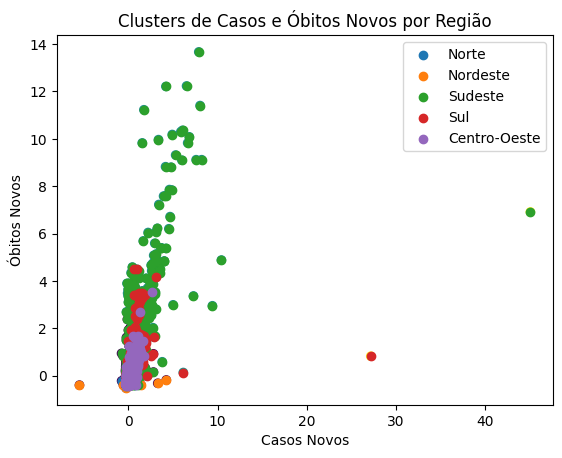

In [ ]:
# Plotando o gráfico
plt.scatter(df_relevant_scaled['casosNovos'], df_relevant_scaled['obitosNovos'], c=cluster_labels)

# Adicionando informações de região aos pontos
regions = df_relevant['regiao'].unique()
for i, region in enumerate(regions):
    region_data = df_relevant_scaled[df_relevant_scaled['regiao'] == region]
    plt.scatter(region_data['casosNovos'], region_data['obitosNovos'], label=region)

plt.xlabel('Casos Novos')
plt.ylabel('Óbitos Novos')
plt.title('Clusters de Casos e Óbitos Novos por Região')
plt.legend()
plt.show()
